<a href="https://colab.research.google.com/github/YLiu95/prgm/blob/main/17a_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework 2: k-means clustering
In this coursework, you will implement and test an unsupervised machine learning algorithm: _k-means clustering_. Once you have completed your work, you will need to submit the results on QM+. To submit your work, first download/export your Jupyter notebook as PDF. Then upload the PDF file in the submission area on QM+.

## Reading

As first step, familiarise yourself with k-means clustering, for example by working through https://en.wikipedia.org/wiki/K-means_clustering.

## Task 1: Prepare two test datasets
Pick a small set of values that enable you to apply clustering using pen&paper. Next create a fresh, or find an existing, large dataset. You may choose to use the Iris dataset, which is included in scikit-learn (and also available as a CSV file on QM+, generated using the below code snippet).
> Marking information: Up to 10 points: clarify why you believe your small dataset to be suitable for k-means clustering. Also make sure you report the source of your large dataset.

Answer:
- The small set of values are [1, 2, 3, 6, 7, 9].
- It is suitable for k-means clustering because it is numerical data so that the mean can be calculated.
- In addition, it only has one dimension, therefore, the calculation of distance is simple.


- Source of my large dataset:
    - The large dataset is generated using `make_blobs` from `sklearn.datasets`.
- The large dataset has 777 samples, 3 clusters, and 2 features.

shape of X:  (777, 2)
number of clusters:  3


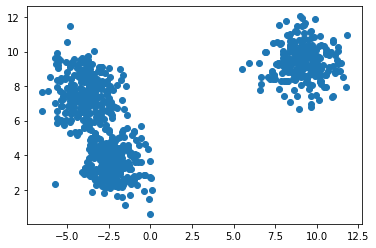

In [ ]:
# generate data for the implimentation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(
    centers=3, n_samples=777, n_features=2, shuffle=True
)
print('shape of X: ', X.shape)

clusters = len(np.unique(y))
print('number of clusters: ', clusters)

# display the data
plt.scatter(X[:,0], X[:,1])

## Task 2: Apply k-means clustering on paper
Work through your small dataset from Task 1 to ensure you have known-good results.
> Marking information: Up to 20 points: include information on how you sanity-checked your results as the number of iterations may considerably affect the precision of your final values.

Answer:
1. Input number of clusters: K = 2
2. Set initial centroid: x1 = 2, x2 = 7
3. Calculate the Euclidean distance between the initial centroid and the data points.
4. Cluster the data points based on the minimum distence.

|Point|Distence to centroid 1|Distence to centroid 2|Cluster|
| ----| -------------------- | -------------------- | ----- |
   1  |          1           |          6           |   1   |
   2  |          0           |          5           |   1   |
   3  |          1           |          4           |   1   |
   6  |          4           |          1           |   2   |
   7  |          5           |          0           |   2   |
   9  |          7           |          2           |   2   |

5. Calculate the new centroid for group 1 and 2 by taking the mean of all points in each group: x1 = 2, x2 = 7.33
6. Repeat step 3, 4, 5 using the new centroid.

|Point|Distence to centroid 1|Distence to centroid 2|Cluster|
| ----| -------------------- | -------------------- | ----- |
   1  |          1           |          6           |   1   |
   2  |          0           |          5           |   1   |
   3  |          1           |          4           |   1   |
   6  |          4           |          1.33        |   2   |
   7  |          5           |          0.33        |   2   |
   9  |          7           |          1.67        |   2   |

The new cluster is the same with the last cluster.

7. Stop the iteration and report the result when the resulting cluster allocation from one iteration to the next one did not change.

Therefore, the two clusters are [1, 2, 3] and [6, 7, 9].

- Sanity-check:
1. One way of sanity-checking the result is to visualise the process to see how the centroids and clusters change after each step.
2. Another way is to use the elbow method where the total sum squared error (SSE) for all clusters are calculated as the number of clusters (K) increase. When the relationship between the total SSE and K are plotted on a graph, the value of K should be selected at the point when the total SSE decreasing from fast to slow.

## Task 3: Create a test harness
Start preparing your implementation by first setting up a test (without having an implementation just yet!). In this way, you will follow a _test-driven development_ approach. As part of this work, you may choose to compare to a reference implementation, like the one shown in the below code example.
> Marking information: Up to 20 points: identify suitable unit tests and integration tests. Explain what coverage you expect your test suite to have.

- I expect the coverage of my test suite to be 50%.

In [ ]:
# create a reference implementation for comparesion
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= clusters)
kmeans.fit(X, y)

print('lables: ', np.unique(kmeans.labels_))
print('cluster centers:\n', kmeans.cluster_centers_)

lables:  [0 1 2]
cluster centers:
 [[ 9.17603636  9.41922993]
 [-3.87819284  7.62595379]
 [-2.27200637  3.55482515]]


In [ ]:
# unit test the function euclidean_distance
def test_euclidean_distance():
    eu1 = euclidean_distance(1,2)
    assert(eu1 == 1)
    eu2 = euclidean_distance(1,1)
    assert(eu2 == 0)
    eu3 = euclidean_distance(2,1)
    assert(eu3 == 1)

test_euclidean_distance()

In [ ]:
# unit test predict function
def test_predict():
    k1 = KMean(K=clusters, max_iters=77, plot_steps=False)
    assert(len(k1.predict(X)) == 777)
    for i in range(3):
        assert("{0:.2f}".format(np.sort(np.unique(k1.predict(X)), axis=0).flatten()[i]) ==
            "{0:.2f}".format(np.sort(np.unique(kmeans.labels_), axis=0).flatten()[i]))

test_predict()

In [ ]:
# unit test to see if the number of clusters are correct.
def test_clusters():
    k1 = KMean(K=clusters, max_iters=77, plot_steps=False)
    assert(len(k1.clusters) == clusters)
    k2 = KMean(K=clusters, max_iters=77, plot_steps=True)
    assert(len(k2.clusters) == clusters)
    k3 = KMean(K=clusters, max_iters=95, plot_steps=False)
    assert(len(k3.clusters) == clusters)

test_clusters()

In [ ]:
# unit test to see if the centroids are the same
# compare to the refernce implementation using assert function
def test_assert_centroids():
    for i in range(6):
        assert("{0:.2f}".format(np.sort(kmeans.cluster_centers_, axis=0).flatten()[i]) ==
            "{0:.2f}".format(np.sort(k.centroids, axis=0).flatten()[i]))

test_assert_centroids()

In [ ]:
# unit test to see if the centroids are the same
# compare to the refernce implementation using assert function using unittest
import unittest

class test_Kmeans_centroids(unittest.TestCase):
    def test_unittest_centroids(self):
        k1 = KMean(K=clusters, max_iters=77, plot_steps=False)
        for i in range(6):
            self.assertAlmostEqual(np.sort(kmeans.cluster_centers_, axis=0).flatten()[i],
                               np.sort(k.centroids, axis=0).flatten()[i])

if __name__ == '__main__':
    # When not using Jupyter notebooks:
    # unittest.main()
    # In Jupyter notebooks use this:
    unittest.main(argv=['this-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [ ]:
# integration test the code
def integration_test():
    k1 = KMean(K=clusters, max_iters=77, plot_steps=False)
    assert(len(k1.predict(X)) == 777)
    assert(len(k1.clusters) == clusters)

integration_test()

## Task 4: Implement k-means clustering in Python
You are now set to actually add the implementation. Note that you are expected to fully implement the mathematical operations instead of using a library function such as `scikit` or `statsmodels`. Your implementation may make several assumptions about the inputs provided to it. Make those explicit in comments. Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.
> Marking information: Up to 50 points: 30 points for a correctly working Python implementation, 10 points for describing limitations and assumptions of your implementation, and 10 points for a description of the complexity of your algorithm.

- Assumptions about the inputs:
    - `K` is the number of clusters. Assume it is 3.
    - `max_iters` is the maximum number of iterations. Assume it is 77.
    - `plot_steps` is whether to plot the steps of clustering. When `plot_steps` equals to Ture, steps of clustering will be plotted. Assume it is true.
- Limitations and assumptions:
    - The implementation needs assumptions on how many clusters are there in the data, rather than find that out itself.
    - The implementation assumes there are 3 clusters.
    - The implementation can only visullise datasets with 2 features, it assumes there are 2 featrures in the dataset.
- Discription of the complexity:
    - The time complexity is linear i.e. O(n).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define a function for calculating the euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

# implement KMean class
class KMean:
    def __init__(self, K, max_iters, plot_steps):
        # store the attributes
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # create empty centorids, this will become the mean feature vector for each cluser
        self.centroids = []

    # implement the predict method
    def predict(self, X):
        # store the data
        self.X = X
        # store the dimensions
        self.n_samples, self.n_features = X.shape

        # initialise centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        # assign the corresponding sample to the centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimise clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create / update clusters)
            self.clusters = self._create_clusters(self.centroids)
            # plot the figure after updating the clusters
            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            # store the centorids for convergence checking later
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # plot the fiugre after updating the centroids
            if self.plot_steps:
                self.plot()

            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    # define a function for getting the lables of each clusters
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        # iterate over the clusters
        for cluster_idx, cluster in enumerate(clusters):
            # iterate over the current clusters
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    # define a function for creating clusters
    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        # iterate over the data
        for idx, sample in enumerate(self.X):
            # get the closest centroid index
            centroid_idx = self._closest_centroid(sample, centroids)
            # append the current sample index to the closet cluster
            clusters[centroid_idx].append(idx)
        return clusters

    # define the closest centroid function
    def _closest_centroid(self, sample, centroids):
        # calculate the distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        # find the index with the minimum distence
        closest_index = np.argmin(distances)
        return closest_index

    # define a function for assigning mean value of clusters to centroids
    def _get_centroids(self, clusters):
        # initialise the centroids with zeros
        centroids = np.zeros((self.K, self.n_features))
        # iterate over the clusters
        for cluster_idx, cluster in enumerate(clusters):
            # calculate the cluster mean
            cluster_mean = np.mean(self.X[cluster], axis=0)
            # assign the mean to the current centroids
            centroids[cluster_idx] = cluster_mean
        return centroids

    # define a function for convergence checking
    def _is_converged(self, centroids_old, centroids):
        # calculate the distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    # define a function for visualisation
    def plot(self):
        # create the figure
        fig, ax = plt.subplots()
        # iterate over the clusters
        for i, index in enumerate(self.clusters):
            # get the current point
            point = self.X[index].T
            # scatter the points
            ax.scatter(*point)
        # plot all the centroids
        for point in self.centroids:
            ax.scatter(*point, marker="+", color="c", linewidth=3)

        plt.show()

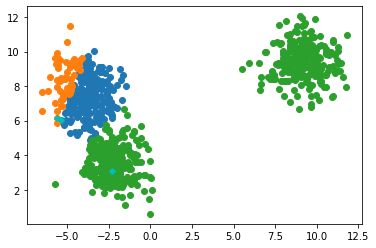

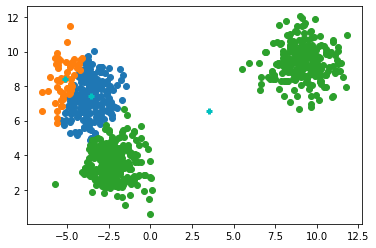

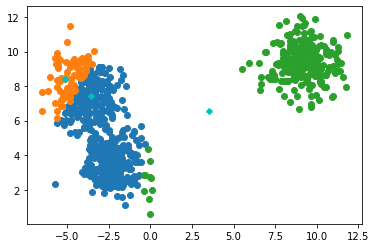

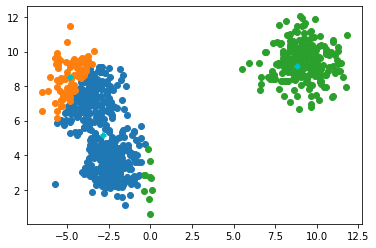

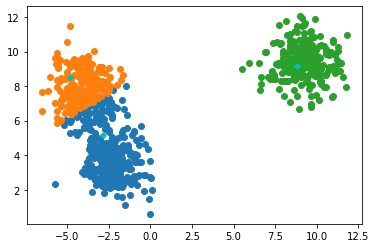

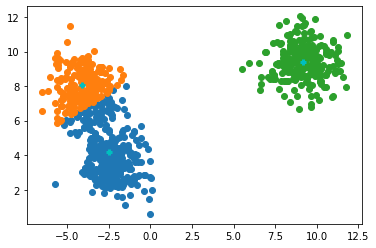

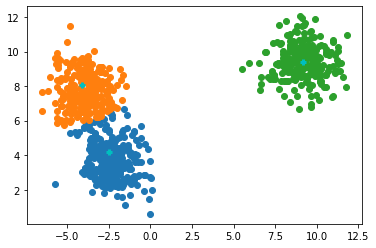

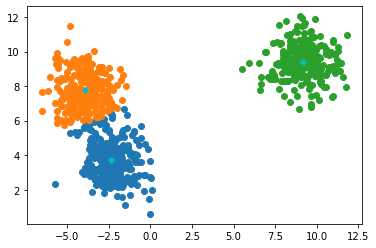

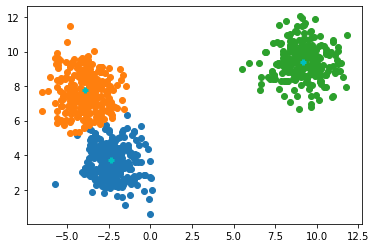

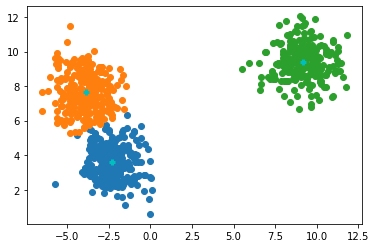

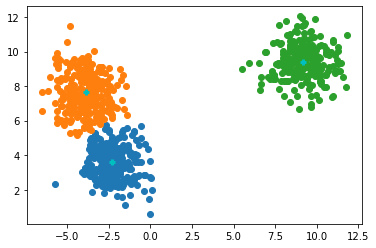

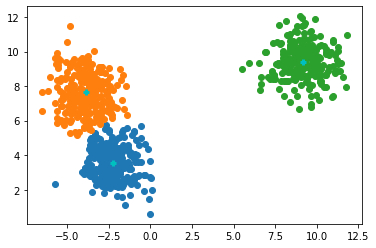

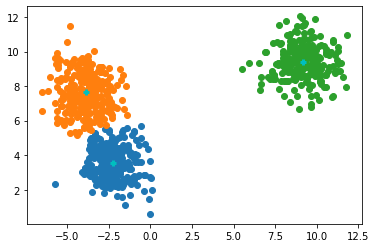

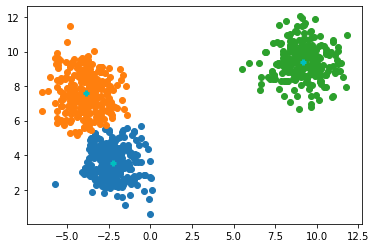

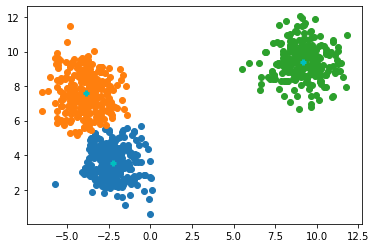

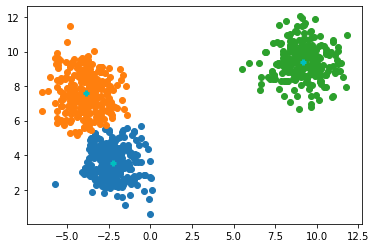

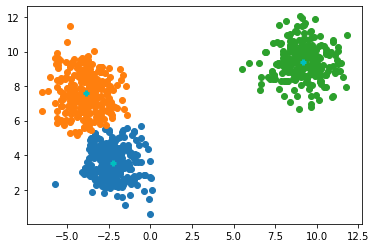

cluster centers:
 [[-2.27200637  3.55482515]
 [-3.87819284  7.62595379]
 [ 9.17603636  9.41922993]]
number of clusters:  3


In [ ]:
# run the implementation
if __name__ == "__main__":
    k = KMean(K=clusters, max_iters=77, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()
    print('cluster centers:\n', k.centroids)
    print('number of clusters: ', len(k.clusters))

Estimate how long the execution of the algorithm will take.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


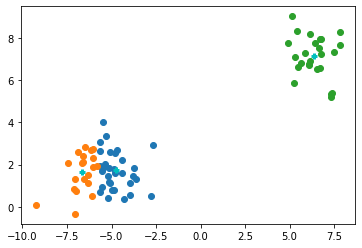

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


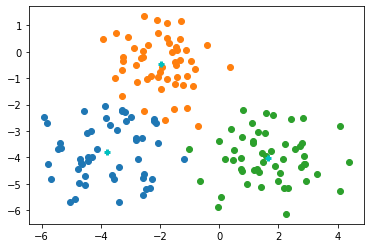

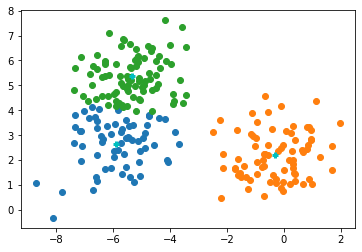

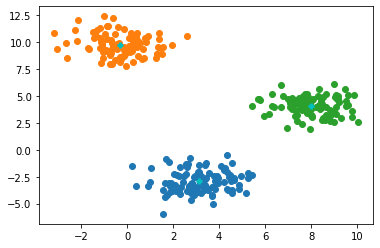

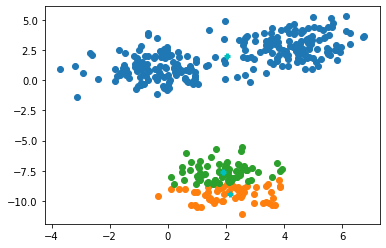

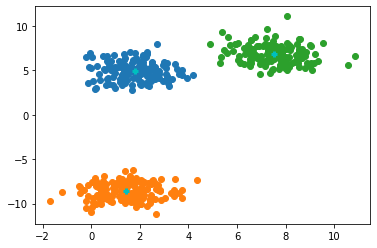

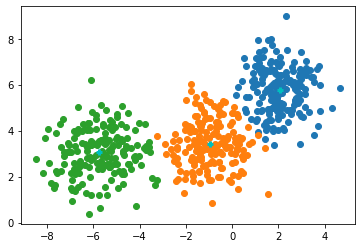

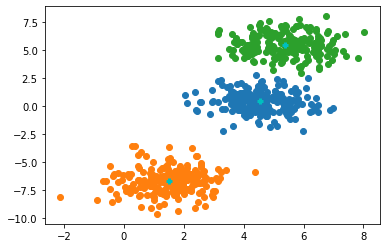

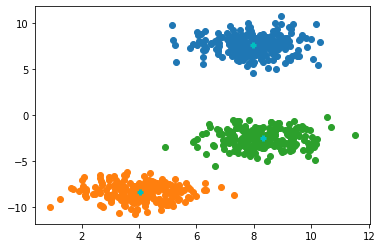

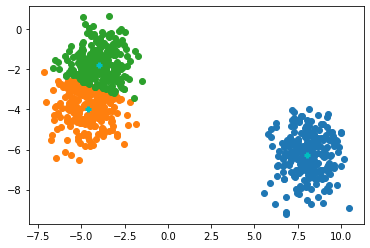

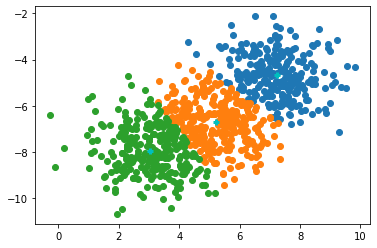

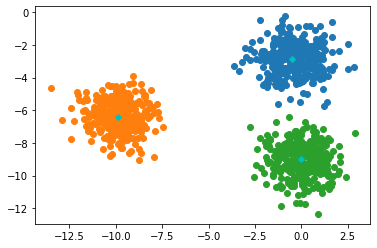

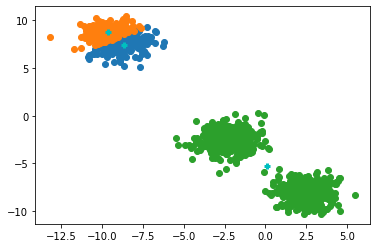

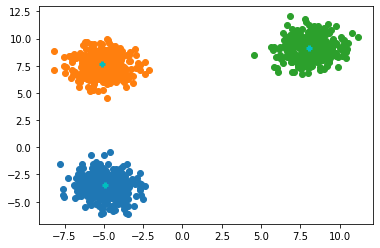

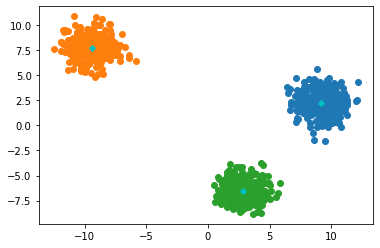

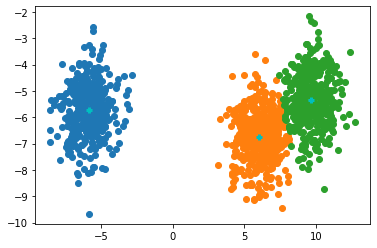

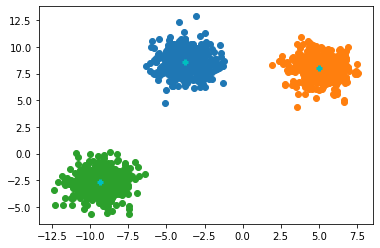

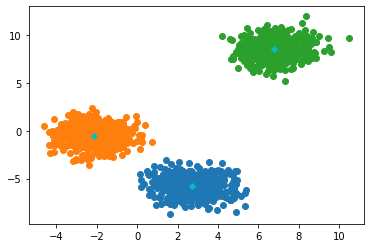

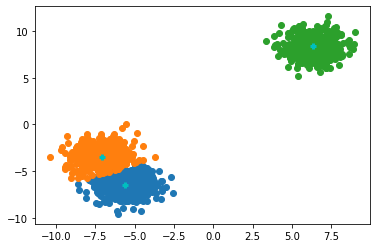

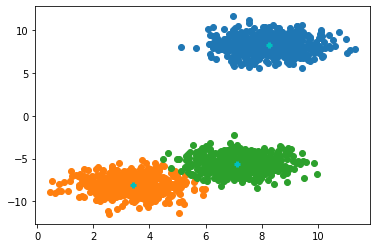

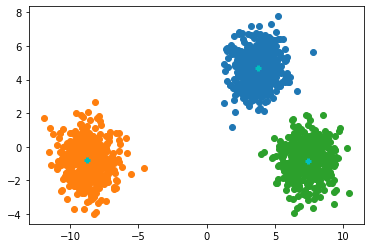

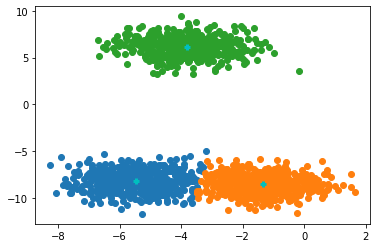

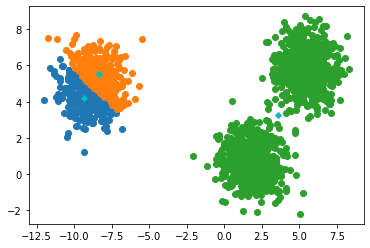

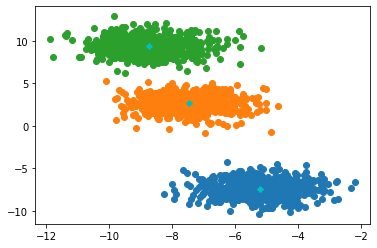

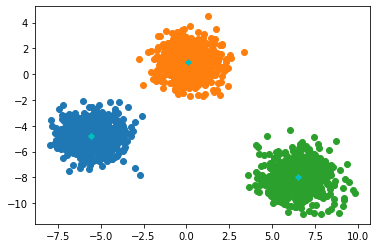

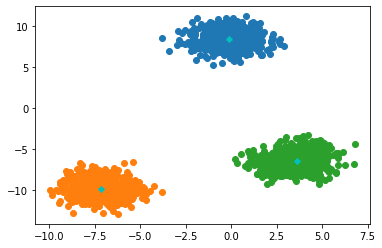

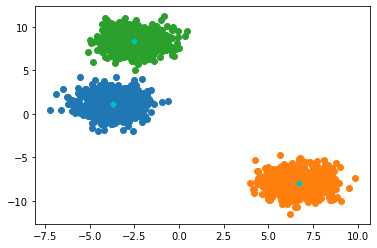

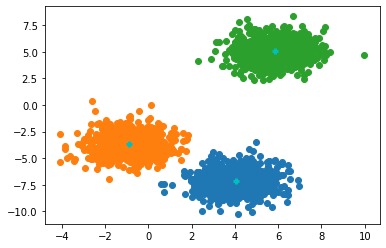

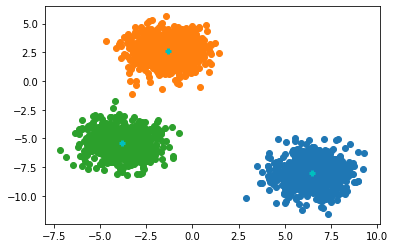

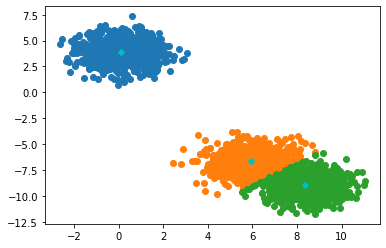

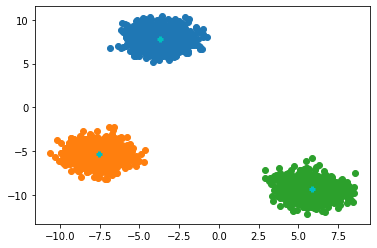

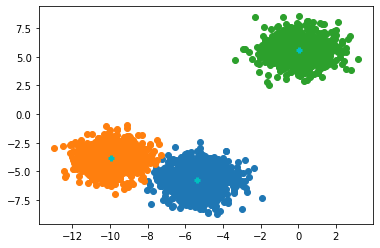

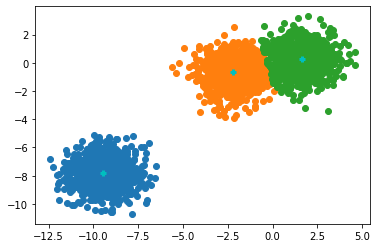

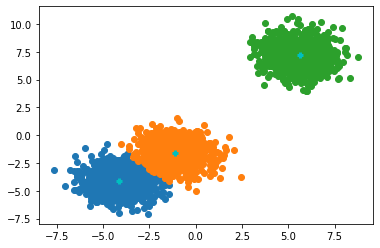

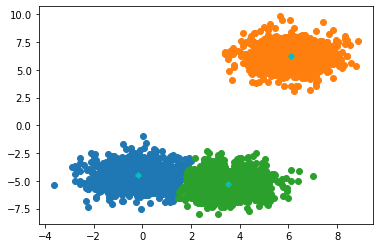

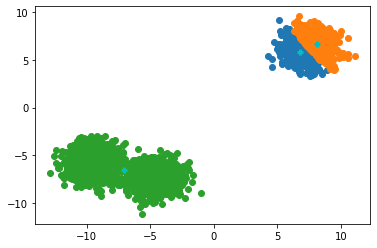

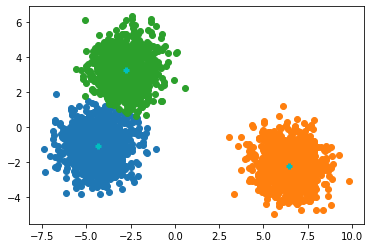

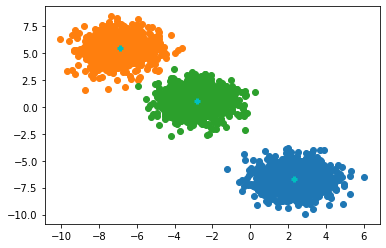

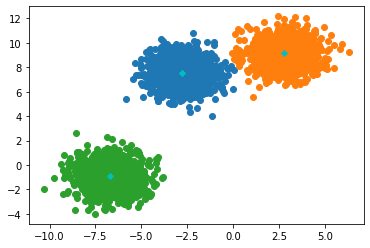

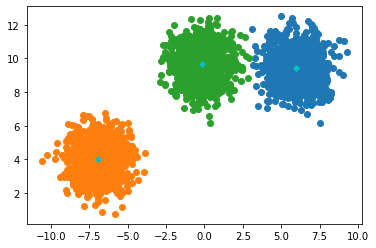

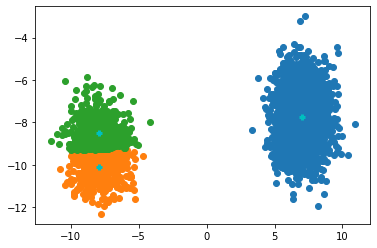

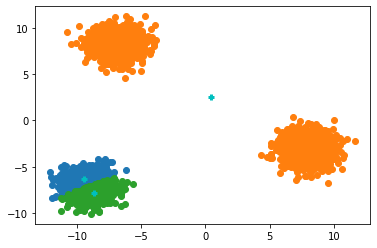

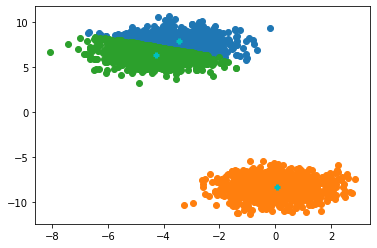

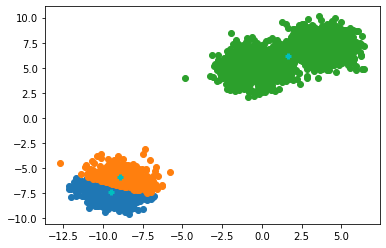

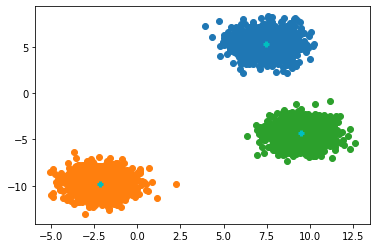

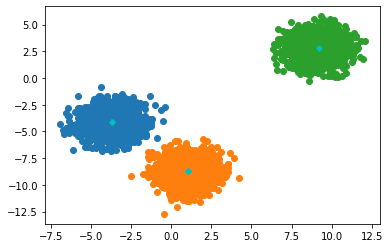

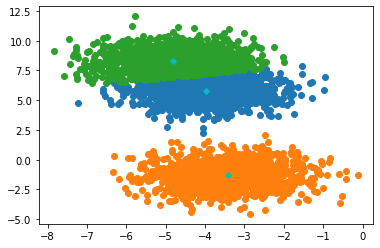

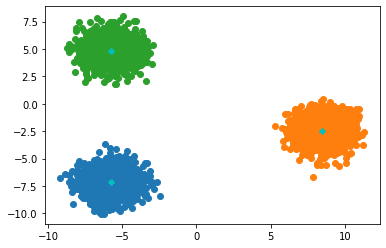

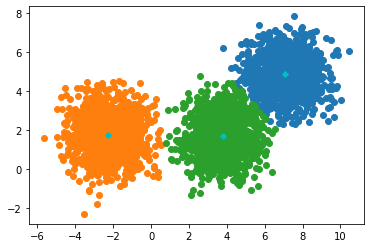

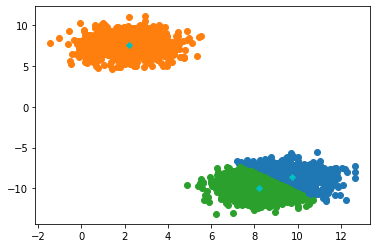

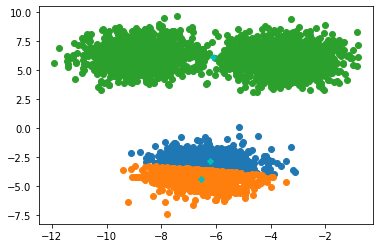

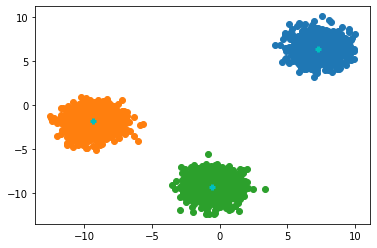

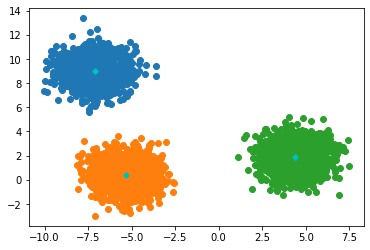

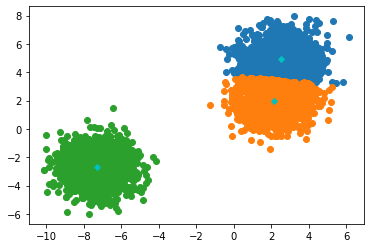

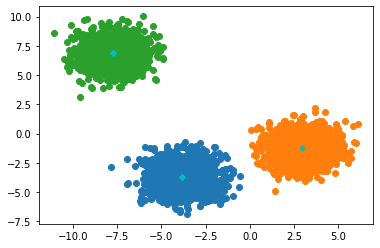

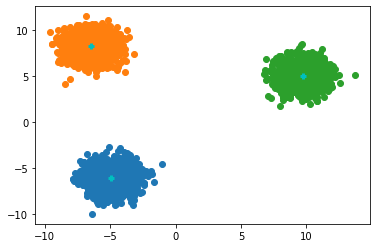

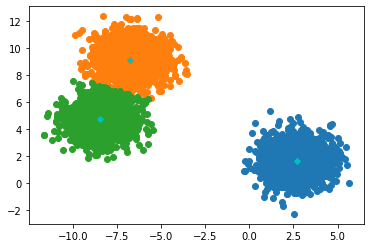

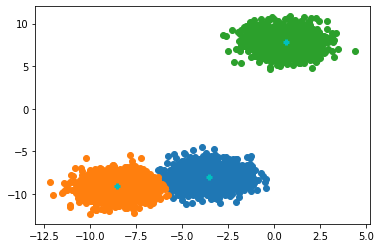

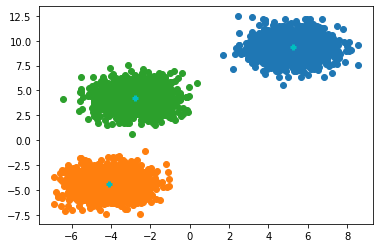

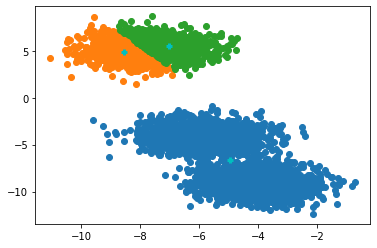

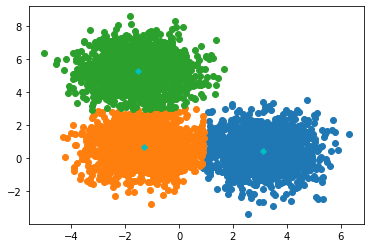

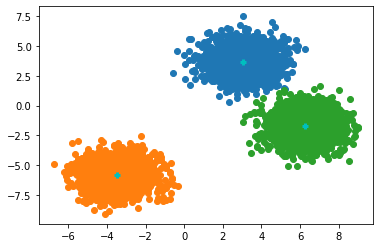

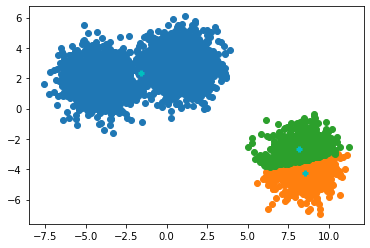

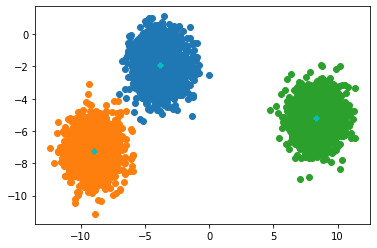

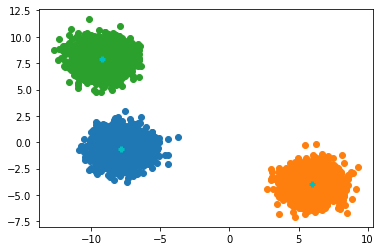

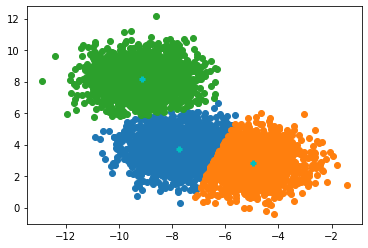

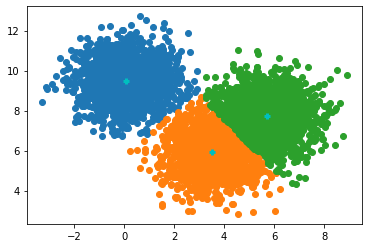

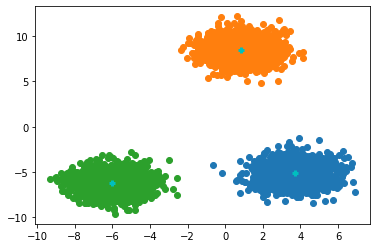

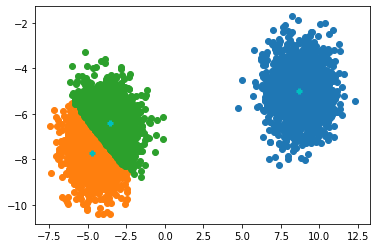

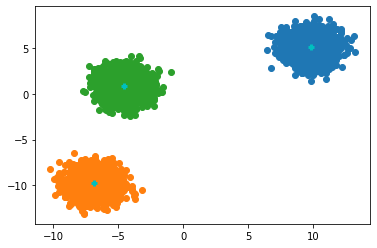

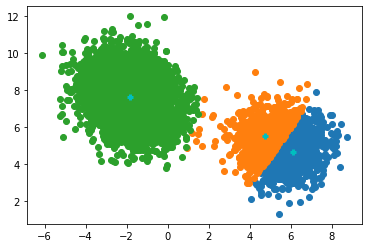

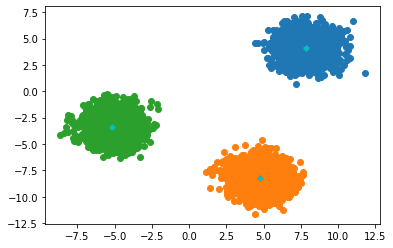

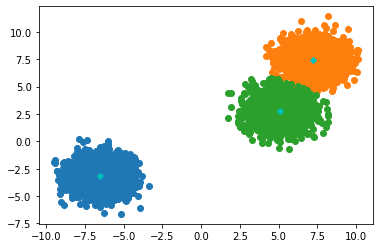

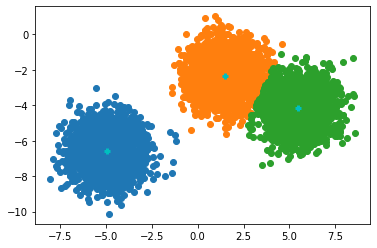

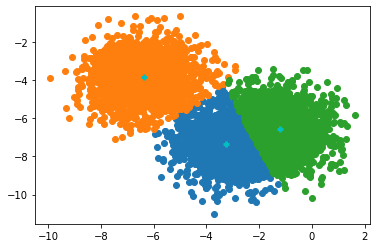

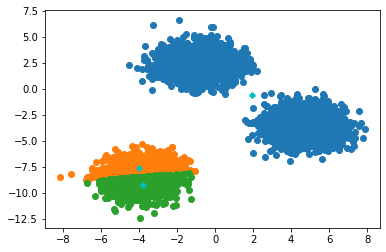

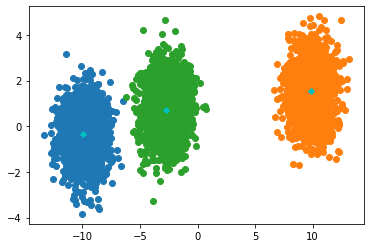

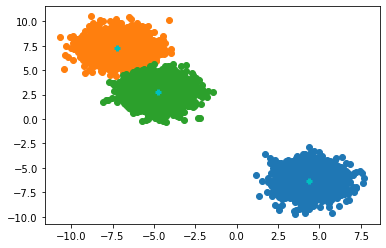

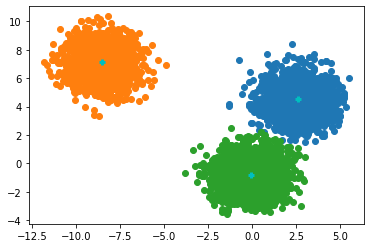

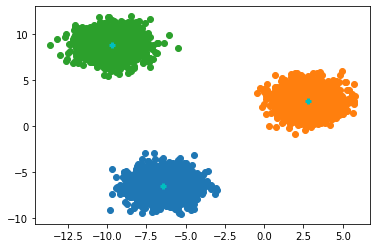

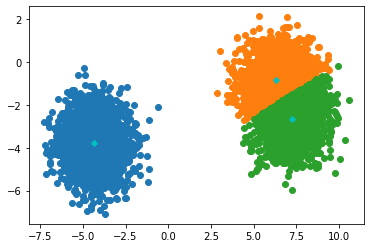

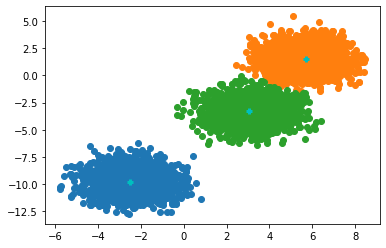

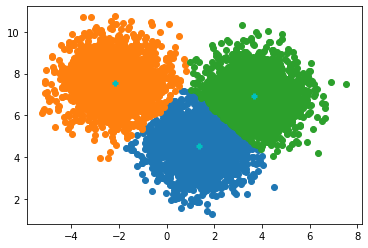

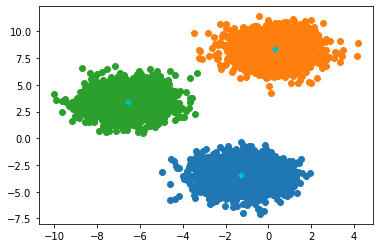

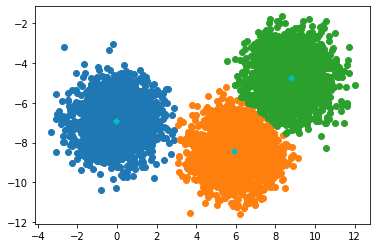

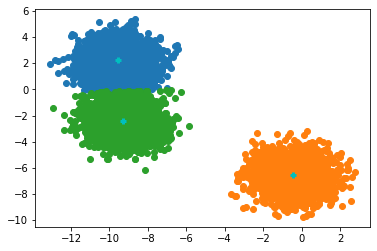

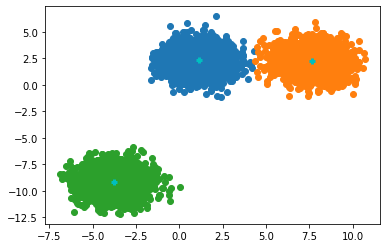

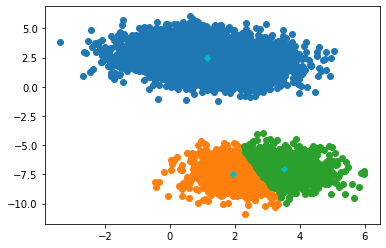

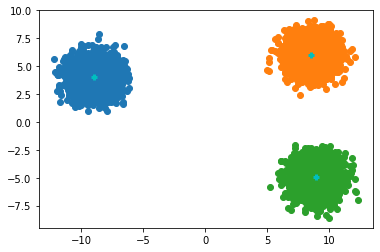

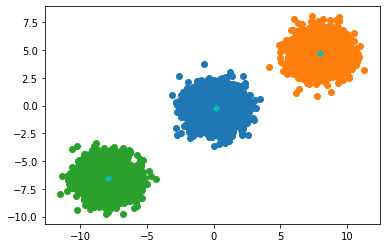

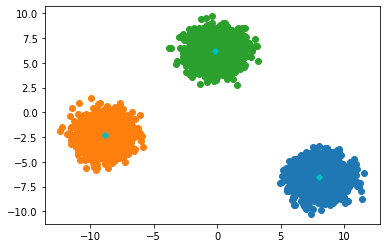

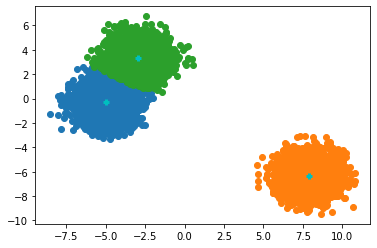

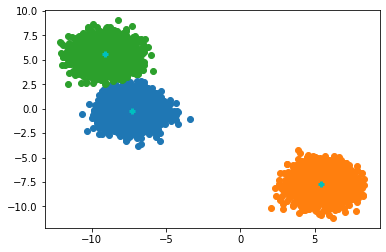

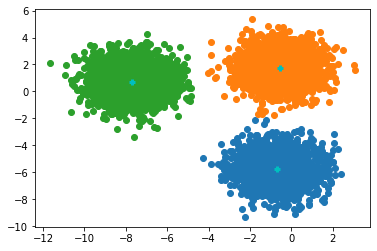

In [ ]:
import time

sample_size = [77*s for s in range(1, 95)]

constant_times = []

from sklearn.datasets import make_blobs
for s in sample_size:
  X, y = make_blobs(
    centers=3, n_samples=s, n_features=2, shuffle=True
)

  tic = time.clock()
  if __name__ == "__main__":
    k = KMean(K=3, max_iters=77, plot_steps=False)
    y_pred = k.predict(X)
    k.plot()
  toc = time.clock()

  constant_times.append(toc-tic)

Represent the sample size and execution time data in a table.

In [ ]:
import pandas as pd
run_time = pd.DataFrame(list(zip(sample_size, constant_times)),
                    columns=['sample_size', 'time'])
run_time

,sample_size,time
0,77,0.145070
1,154,0.264362
2,231,0.263319
3,308,0.255504
4,385,0.295624
...,...,...
89,6930,1.312568
90,7007,1.253124
91,7084,2.667087
92,7161,1.659922


Express the estimate as a function of the inputs.

In [ ]:
x = run_time['sample_size'].values
y = run_time['time'].values
w = np.polyfit(x,y,1)
print('estimated execution time: ', "{0:.4f}".format(w[0]), '* sample size +',
      "{0:.2f}".format(w[1]), 'seconds')

estimated execution time:  0.0005 * sample size + 0.07 seconds


The plot below visuallised the relationship between execution time and sample size.

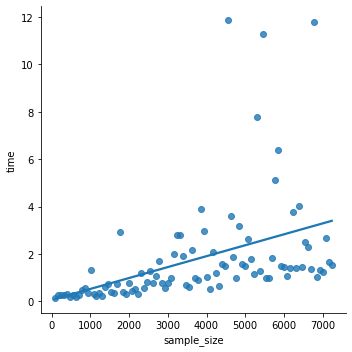

In [ ]:
import seaborn as sns
_ = sns.lmplot(x='sample_size', y='time', data=run_time, ci=None)

## Optional Task 5: Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.
> Marking information: Up to 20 _bonus_ points: if you choose to complete this _optional_ task, you may be able to recover marks lost elsewhere.

The visualisation is added in task 4.